# Results comparison: Netlogo vs Python

- Revision protocol: BEP.
- We compare:
    - Simulations with 1000, 100 and 50 agents in asynchronous-random-independent mode.
    - Simulations with 1000 agents in all-in-one-tick mode.
    - The mean dynamics.

In [1]:
import pandas as pd
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Mean dynamics

$$\dot{x} = p - q$$

- $p$: 
    - Probability of selecting a player without optimal strategy: (1-x) 
    - Probability of selecting an opponent with optimal strategy: x
    - Probability of getting payoff 0 at every test: x(1-x)
    - When the case above occurs, we must multiply by $\frac{1}{n}$
$$p = (1-x)\left[x + \frac{x(1-x)}{n}\right]$$
- $q$: 
    - Probability of selecting an player with optimal strategy: x 
    - Probability of getting payoff 0 when the agent tests the optimal strategy and payoff > 0 when testing any other strategy: $(1-x)^2$
    - Probability of getting payoff 0 at every test: x(1-x)
    - When the case above occurs, we must multiply by $\frac{n-1}{n}$
$$q = x\left[(1-x)^2 + \frac{x(1-x)(n-1)}{n}\right]$$
$$\dot{x} = (1-x)\left[x + \frac{x(1-x)}{2}\right] - x\left[(1-x)^2 + \frac{x(1-x)}{2}\right]$$

$$\dot{x} = (1-x)x\left[1 + \frac{(1-x)}{2}\right] - x(1-x)\left[(1-x) + \frac{x}{2}\right]$$

$$\dot{x} = (1-x)x\left[1 + \frac{(1-x)}{2} - (1-x) - \frac{x}{2}\right]$$

$$\dot{x} = (1-x)x\left[\frac{1}{2} -\frac{x}{2} + x - \frac{x}{2}\right] = \frac{(1-x)x}{2}$$

In [2]:
def mean_dynamics(x, t):
    return (1 - x) * x / 2

In [3]:
t = np.linspace(0, 50, 51)
initial_proportion_optimal_strategists = 0.1

In [4]:
mean_dynamics_integration = odeint(mean_dynamics, initial_proportion_optimal_strategists, t)

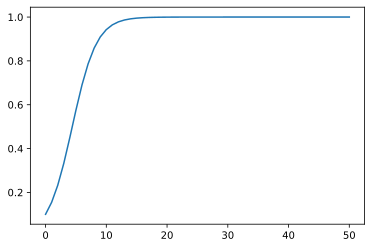

In [5]:
plt.plot(mean_dynamics_integration, label="MD")

## asynchronous-random-independent

# 1000 agents 

## Netlogo

In [6]:
netlogo_dir = "/home/javi/NetLogo 6.1.0/netlogo-agent-based-models"

In [7]:
file = "netlogo_bep_2_strategies_10_runs_true_async-random-independent_1000_agents.csv"
syncfalse_allinfalse_1000 = pd.read_csv("/".join([netlogo_dir, file]), skiprows=6)

In [8]:
syncfalse_allinfalse_1000.columns = ["run_number", "n-of-players", "n-of-strategies", "synchronous-updating", "all-in-one-tick", "step", "strategy_ratio"]

In [9]:
syncfalse_allinfalse_1000[syncfalse_allinfalse_1000["run_number"]==1].head(5)

run_number  n-of-players  n-of-strategies  synchronous-updating  \
3            1          1000                2                 False   
8            1          1000                2                 False   
11           1          1000                2                 False   
14           1          1000                2                 False   
19           1          1000                2                 False   

    all-in-one-tick  step  strategy_ratio  
3             False     0           0.100  
8             False     1           0.184  
11            False     2           0.300  
14            False     3           0.416  
19            False     4           0.540

### We plot the whole set of curves

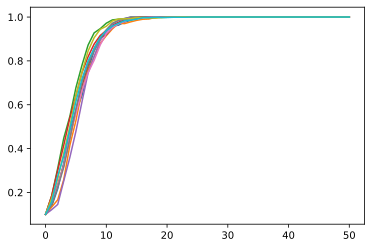

In [10]:
for i in list(syncfalse_allinfalse_1000["run_number"].unique()):
    plt.plot(syncfalse_allinfalse_1000[syncfalse_allinfalse_1000["run_number"]==i].sort_values("step")["strategy_ratio"].values)

### We plot the average value at each step

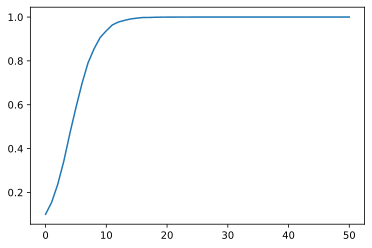

In [11]:
plt.plot(syncfalse_allinfalse_1000.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values)

## Python

In [12]:
file = "python_bep_2_strategies_10_runs_true_async-random-independent_1000_agents.csv"
python_syncfalse_allinfalse_1000 = pd.read_csv("/home/javi/PycharmProjects/python-agent-based-model/{}".format(file), sep="|")

In [13]:
# python_syncfalse_allinfalse_1000

### We plot the whole set of curves

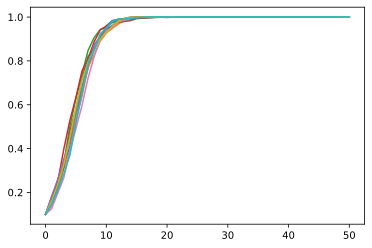

In [14]:
for i in list(python_syncfalse_allinfalse_1000["run_number"].unique()):
    plt.plot(python_syncfalse_allinfalse_1000[python_syncfalse_allinfalse_1000["run_number"]==i].sort_values("step")["strategy_ratio"].values)

### We plot the average value at each step

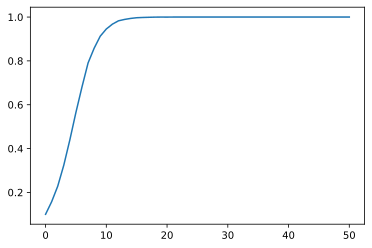

In [15]:
plt.plot(python_syncfalse_allinfalse_1000.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values, label="python")

### Netlogo, Python y MD

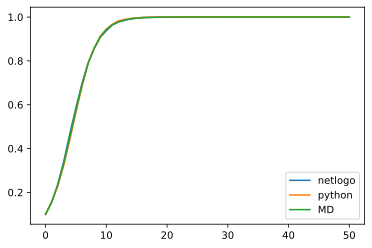

In [16]:
plt.plot(syncfalse_allinfalse_1000.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values, label="netlogo")
plt.plot(python_syncfalse_allinfalse_1000.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values, label="python")
plt.plot(mean_dynamics_integration, label="MD")
plt.legend()

In [17]:
# python_syncfalse_allinfalse_1000[python_syncfalse_allinfalse_1000["run_number"]==1].head(15)

# 100 agents

## Netlogo

In [18]:
file = "netlogo_bep_2_strategies_1000_runs_true_async-random-independent_100_agents.csv"
syncfalse_allinfalse_100 = pd.read_csv(file, skiprows=6)

In [19]:
syncfalse_allinfalse_100.columns = ["run_number", "n-of-players", "n-of-strategies", "synchronous-updating", "all-in-one-tick", "step", "strategy_ratio"]

In [20]:
# syncfalse_allinfalse_1000[syncfalse_allinfalse_1000["run_number"]==1].head(15)

### We plot the whole set of curves

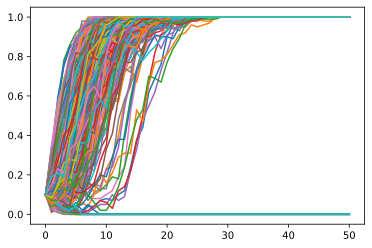

In [21]:
for i in list(syncfalse_allinfalse_100["run_number"].unique()):
    plt.plot(syncfalse_allinfalse_100[syncfalse_allinfalse_100["run_number"]==i].sort_values("step")["strategy_ratio"].values)

### We plot the average value at each step

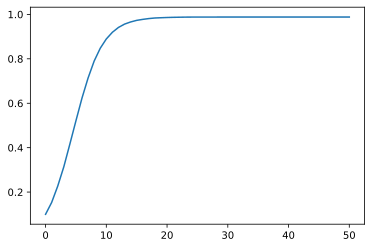

In [22]:
plt.plot(syncfalse_allinfalse_100.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values)

## Python

In [23]:
file = "python_bep_2_strategies_1000_runs_true_async-random-independent_100_agents.csv"
python_syncfalse_allinfalse_100 = pd.read_csv("/home/javi/PycharmProjects/python-agent-based-model/{}".format(file), sep="|")

In [24]:
# python_syncfalse_allinfalse_100

### We plot the whole set of curves

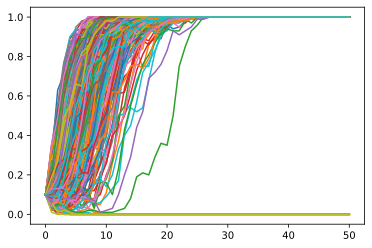

In [25]:
for i in list(python_syncfalse_allinfalse_100["run_number"].unique()):
    plt.plot(python_syncfalse_allinfalse_100[python_syncfalse_allinfalse_100["run_number"]==i].sort_values("step")["strategy_ratio"].values)

### We plot the average value at each step

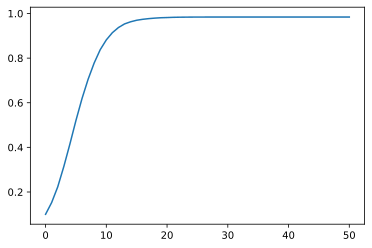

In [26]:
plt.plot(python_syncfalse_allinfalse_100.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values, label="python")

### Netlogo, Python y MD

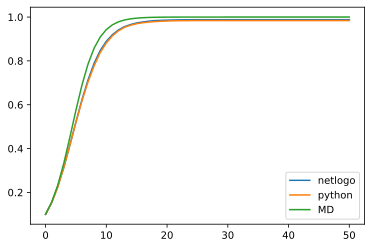

In [27]:
plt.plot(syncfalse_allinfalse_100.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values, label="netlogo")
plt.plot(python_syncfalse_allinfalse_100.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values, label="python")
plt.plot(mean_dynamics_integration, label="MD")
plt.legend()

In [28]:
# python_syncfalse_allinfalse_100[python_syncfalse_allinfalse_100["run_number"]==1].head(15)

# 50 agents

## Netlogo

In [29]:
file = "netlogo_bep_2_strategies_1000_runs_true_async-random-independent_50_agents.csv"
syncfalse_allinfalse_50 = pd.read_csv(file, skiprows=6)

In [30]:
syncfalse_allinfalse_50.columns = ["run_number", "n-of-players", "n-of-strategies", "synchronous-updating", "all-in-one-tick", "step", "strategy_ratio"]

In [31]:
# syncfalse_allinfalse_10[syncfalse_allinfalse_1000["run_number"]==1].head(15)

### We plot the whole set of curves

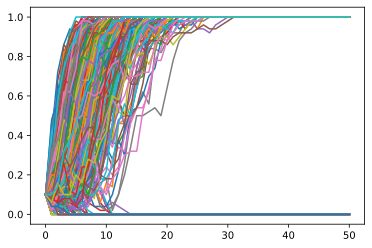

In [32]:
for i in list(syncfalse_allinfalse_50["run_number"].unique()):
    plt.plot(syncfalse_allinfalse_50[syncfalse_allinfalse_50["run_number"]==i].sort_values("step")["strategy_ratio"].values)

### We plot the average value at each step

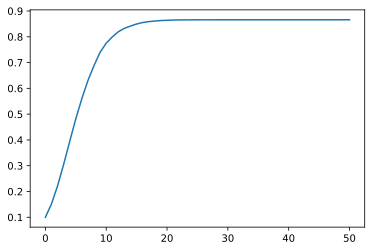

In [33]:
plt.plot(syncfalse_allinfalse_50.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values)

## Python

In [34]:
file = "python_bep_2_strategies_1000_runs_true_async-random-independent_50_agents.csv"
python_syncfalse_allinfalse_50 = pd.read_csv("/home/javi/PycharmProjects/python-agent-based-model/{}".format(file), sep="|")

In [35]:
# python_syncfalse_allinfalse_100

### We plot the whole set of curves

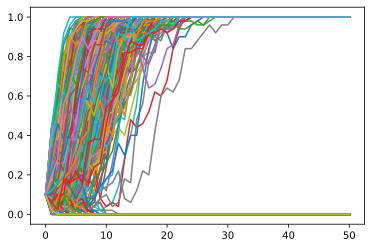

In [36]:
for i in list(python_syncfalse_allinfalse_50["run_number"].unique()):
    plt.plot(python_syncfalse_allinfalse_50[python_syncfalse_allinfalse_50["run_number"]==i].sort_values("step")["strategy_ratio"].values)

### We plot the average value at each step

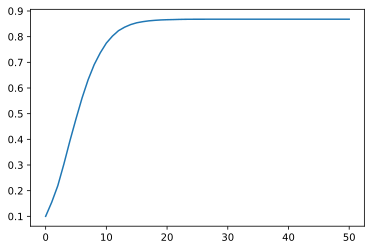

In [39]:
plt.plot(python_syncfalse_allinfalse_50.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values, label="python")

### Netlogo, Python y MD

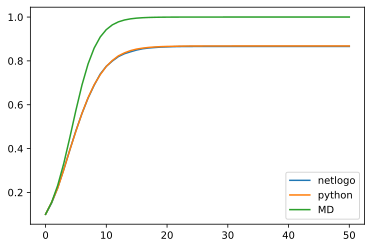

In [40]:
plt.plot(syncfalse_allinfalse_50.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values, label="netlogo")
plt.plot(python_syncfalse_allinfalse_50.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values, label="python")
plt.plot(mean_dynamics_integration, label="MD")
plt.legend()

In [38]:
# python_syncfalse_allinfalse_50[python_syncfalse_allinfalse_50["run_number"]==1].head(15)

# all-in-one-tick

# 1000 agents

## Netlogo

In [41]:
netlogo_dir = "/home/javi/NetLogo 6.1.0/netlogo-agent-based-models"

In [42]:
file = "netlogo_bep_2_strategies_100_runs_all-in-one-tick_1000_agents.csv"
netlogo_allinonetick = pd.read_csv(file, skiprows=6)

In [43]:
netlogo_allinonetick.columns = ["run_number", "n-of-players", "n-of-strategies", "synchronous-updating", "all-in-one-tick", "step", "strategy_ratio"]

In [45]:
netlogo_allinonetick[netlogo_allinonetick["run_number"]==1].head(5)

run_number  n-of-players  n-of-strategies  synchronous-updating  \
3            1          1000                2                 False   
6            1          1000                2                 False   
12           1          1000                2                 False   
16           1          1000                2                 False   
22           1          1000                2                 False   

    all-in-one-tick  step  strategy_ratio  
3              True     0           0.100  
6              True     1           0.270  
12             True     2           0.456  
16             True     3           0.674  
22             True     4           0.826

### We plot the whole set of curves

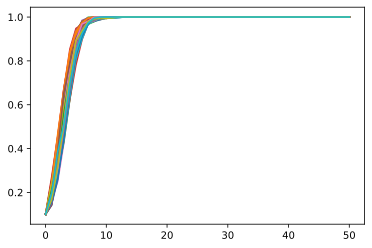

In [46]:
for i in list(netlogo_allinonetick["run_number"].unique()):
    plt.plot(netlogo_allinonetick[netlogo_allinonetick["run_number"]==i].sort_values("step")["strategy_ratio"].values)

### We plot the average value at each step

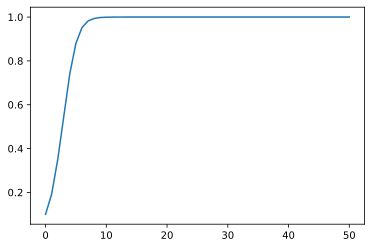

In [47]:
plt.plot(netlogo_allinonetick.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values)

## Python

In [48]:
file = "python_bep_2_strategies_100_runs_all-in-one-tick_1000_agents.csv"
python_allinonetick = pd.read_csv("/home/javi/PycharmProjects/python-agent-based-model/{}".format(file), sep="|")

In [49]:
# python_syncfalse_allinfalse_1000

### We plot the whole set of curves

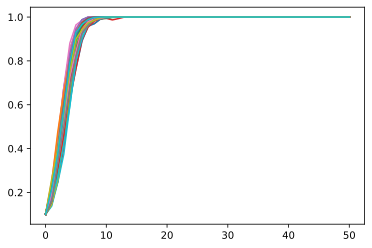

In [50]:
for i in list(python_allinonetick["run_number"].unique()):
    plt.plot(python_allinonetick[python_allinonetick["run_number"]==i].sort_values("step")["strategy_ratio"].values)

### We plot the average value at each step

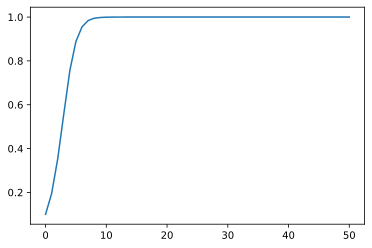

In [51]:
plt.plot(python_allinonetick.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values, label="python")

In [52]:
# python_allinonetick[python_allinonetick["run_number"]==1].head(15)

### Netlogo, Python y MD

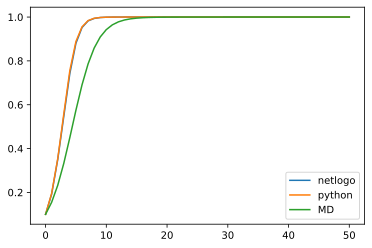

In [53]:
plt.plot(netlogo_allinonetick.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values, label="netlogo")
plt.plot(python_allinonetick.groupby("step", as_index=False).mean("strategy_ratio").sort_values("step")["strategy_ratio"].values, label="python")
plt.plot(mean_dynamics_integration, label="MD")
plt.legend()